In [1]:
import numpy as np
import pandas as pd

import nltk
import string
from nltk.corpus import stopwords


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91635\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [10]:
tr = train.copy()

In [11]:
tr.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
tr.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
tr.drop('id',inplace=True,axis=1)

In [14]:
tr['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [15]:
tr['location'].value_counts()

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
Noida, NCR, India                 1
?205?478?                         1
Amazon Seller , Propagandist      1
Va Beach, Virginia                1
Essex                             1
Name: location, Length: 3341, dtype: int64

In [16]:
tr.drop('location',axis=1,inplace=True)

In [17]:
tr['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

C:\Users\91635\anaconda3\envs\data_science\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

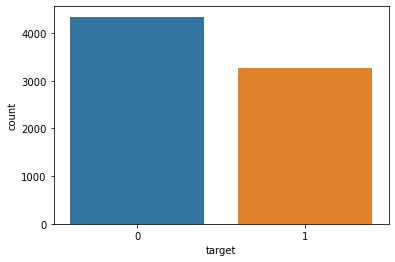

In [18]:
sns.countplot(tr['target'])

In [19]:
y = tr['target']

In [20]:
tr.drop('target',inplace=True,axis=1)

In [21]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [22]:
test.shape
testid = test['id']


In [23]:
test.drop('id',axis=1,inplace=True)
test.drop('location',axis=1,inplace=True)

In [24]:
test.head()

,keyword,text
0,NaN,Just happened a terrible car crash
1,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [25]:
testid.head()

0     0
1     2
2     3
3     9
4    11
Name: id, dtype: int64

In [27]:
tr.shape

(7613, 2)

In [28]:
tr = pd.concat([tr,test],axis=0)

In [29]:
tr.shape

(10876, 2)

In [30]:
tr.head()

,keyword,text
0,NaN,Our Deeds are the Reason of this #earthquake M...
1,NaN,Forest fire near La Ronge Sask. Canada
2,NaN,All residents asked to 'shelter in place' are ...
3,NaN,"13,000 people receive #wildfires evacuation or..."
4,NaN,Just got sent this photo from Ruby #Alaska as ...


In [31]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
tr['text'].apply(text_process)

0       [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
1           [Forest, fire, near, La, Ronge, Sask, Canada]
2       [residents, asked, shelter, place, notified, o...
3       [13000, people, receive, wildfires, evacuation...
4       [got, sent, photo, Ruby, Alaska, smoke, wildfi...
                              ...                        
3258    [EARTHQUAKE, SAFETY, LOS, ANGELES, ÛÒ, SAFETY...
3259    [Storm, RI, worse, last, hurricane, cityamp3ot...
3260    [Green, Line, derailment, Chicago, httptcoUtbX...
3261    [MEG, issues, Hazardous, Weather, Outlook, HWO...
3262    [CityofCalgary, activated, Municipal, Emergenc...
Name: text, Length: 10876, dtype: object

In [33]:
tr.head()

,keyword,text
0,NaN,Our Deeds are the Reason of this #earthquake M...
1,NaN,Forest fire near La Ronge Sask. Canada
2,NaN,All residents asked to 'shelter in place' are ...
3,NaN,"13,000 people receive #wildfires evacuation or..."
4,NaN,Just got sent this photo from Ruby #Alaska as ...


In [34]:
tr.keyword.value_counts()

annihilation             50
hostage                  50
fatalities               50
hailstorm                50
landslide                50
                         ..
forest%20fire            24
threat                   16
radiation%20emergency    14
inundation               14
epicentre                13
Name: keyword, Length: 221, dtype: int64

In [35]:
tr.keyword.fillna('new',inplace=True)

In [36]:
def cleanKeyword(text):
    
    text = text.lower()   # to convert to all lower case text.
    text = text.replace('%20',' ')   # Remove '%20' if present.
    
    return text

In [37]:
tr['new_keyword'] = tr['keyword'].apply(cleanKeyword)

In [38]:
tr.drop('keyword',axis=1,inplace=True)

In [39]:
tr.head()

,text,new_keyword
0,Our Deeds are the Reason of this #earthquake M...,new
1,Forest fire near La Ronge Sask. Canada,new
2,All residents asked to 'shelter in place' are ...,new
3,"13,000 people receive #wildfires evacuation or...",new
4,Just got sent this photo from Ruby #Alaska as ...,new


In [40]:
tr['new_tweet']=tr['text']+tr['new_keyword']

In [41]:
tr.drop('text',axis=1,inplace=True)
tr.drop('new_keyword',axis=1,inplace=True)

In [42]:
tr.head()

,new_tweet
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canadanew
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [43]:
vector = TfidfVectorizer(sublinear_tf=True, max_features=2700)
X = vector.fit_transform(tr['new_tweet'].values)

In [44]:
X_col = vector.get_feature_names()

In [45]:
df = pd.DataFrame.sparse.from_spmatrix(X, columns = X_col)

In [46]:
df.head()

,00,01,02,03,04,05,06,07,08,09,...,û_suicide,ûª,ûªm,ûªs,ûªt,ûªve,ûï,ûïwhen,ûò,ûó
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df.shape

(10876, 2700)

In [48]:
test = df.iloc[7613:]

In [49]:
test.reset_index(drop = True , inplace = True)

In [50]:
test.head()

,00,01,02,03,04,05,06,07,08,09,...,û_suicide,ûª,ûªm,ûªs,ûªt,ûªve,ûï,ûïwhen,ûò,ûó
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
train_df = df.iloc[:7613]

In [59]:
train_df.head()

,00,01,02,03,04,05,06,07,08,09,...,û_suicide,ûª,ûªm,ûªs,ûªt,ûªve,ûï,ûïwhen,ûò,ûó
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
test.shape

(3263, 2700)

In [63]:
from sklearn.naive_bayes import MultinomialNB
disaster_tweet_model = MultinomialNB().fit(train_df, y)

In [64]:
all_predictions = disaster_tweet_model.predict(test)

In [65]:
len(all_predictions)

3263

In [66]:
submit=pd.DataFrame()
submit['id'] = testid
submit['target'] = all_predictions 
submit.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1


In [69]:
submit.to_csv('submit',index=False)